In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the data
path = "/content/drive/MyDrive/Data_set/ML project/data.csv"
data = pd.read_csv(path)
data.head()

,\tEmail,Address,Avatar,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,12.66,39.58,4.08,587.95
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,11.11,37.27,2.66,392.20
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,11.33,37.11,4.10,487.55
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,13.72,36.72,3.12,581.85
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,12.80,37.54,4.45,599.41


In [ ]:
# 1. Data Loading and Inspection
print("\nData info")
print(data.info())
print("\nData Description")
print(data.describe())


Data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   	Email                500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Time on App           500 non-null    float64
 4   Time on Website       500 non-null    float64
 5   Length of Membership  500 non-null    float64
 6   Yearly Amount Spent   500 non-null    float64
dtypes: float64(4), object(3)
memory usage: 27.5+ KB
None

Data Description
       Time on App  Time on Website  Length of Membership  Yearly Amount Spent
count   500.000000       500.000000             500.00000           500.000000
mean     12.052620        37.060480               3.53336           499.314240
std       0.994418         1.010555               0.99926            79.314764
min       8.510000        33.91000

Data Preprocessing

In [ ]:
# Remove the leading spaces and qoutes from the Email Column
data["Email"] = data["\tEmail"].str.replace('"', '', regex=True)
data.drop("\tEmail", axis=1, inplace=True)

In [ ]:
# One-hot encode 'Avatar' column
data = pd.get_dummies(data, columns=['Avatar'], drop_first=True)

In [ ]:
# Select features (X) and target (y)
X = data.drop(['Address', 'Yearly Amount Spent', 'Email'], axis=1)
y = data['Yearly Amount Spent']

Train-Test Split

In [ ]:
# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 4. Model Creation
model = LinearRegression()

In [ ]:
# 5. Model Training
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 6. Prediction
y_pred = model.predict(X_test)

In [ ]:
# 7. Model Evaluation
print("\nModel Coefficients:")
print(pd.DataFrame(model.coef_, index = X.columns, columns=['coefficient']))
print("\nModel Intercept:", model.intercept_)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nMean Squared Error:", mse)
print("R-squared:", r2)


Model Coefficients:
                      coefficient
Time on App             38.863649
Time on Website          0.651747
Length of Membership    63.397290
Avatar_AntiqueWhite     11.071479
Avatar_Aqua             19.981242
...                           ...
Avatar_Wheat            26.324716
Avatar_White            10.406398
Avatar_WhiteSmoke       27.577656
Avatar_Yellow           45.301664
Avatar_YellowGreen      -7.080998

[140 rows x 1 columns]

Model Intercept: -238.9392809468281

Mean Squared Error: 1199.9998617074125
R-squared: 0.7576623371687694


Visualization

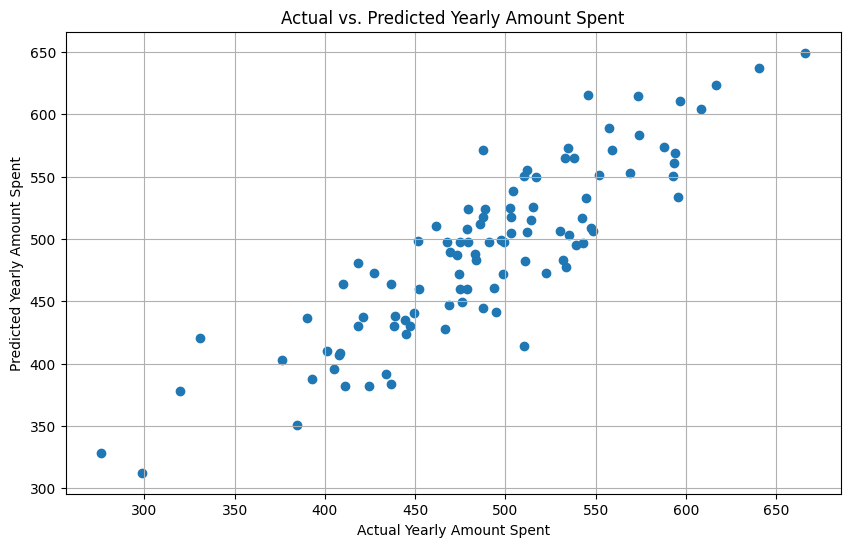

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Yearly Amount Spent")
plt.ylabel("Predicted Yearly Amount Spent")
plt.title("Actual vs. Predicted Yearly Amount Spent")
plt.grid(True)
plt.show()

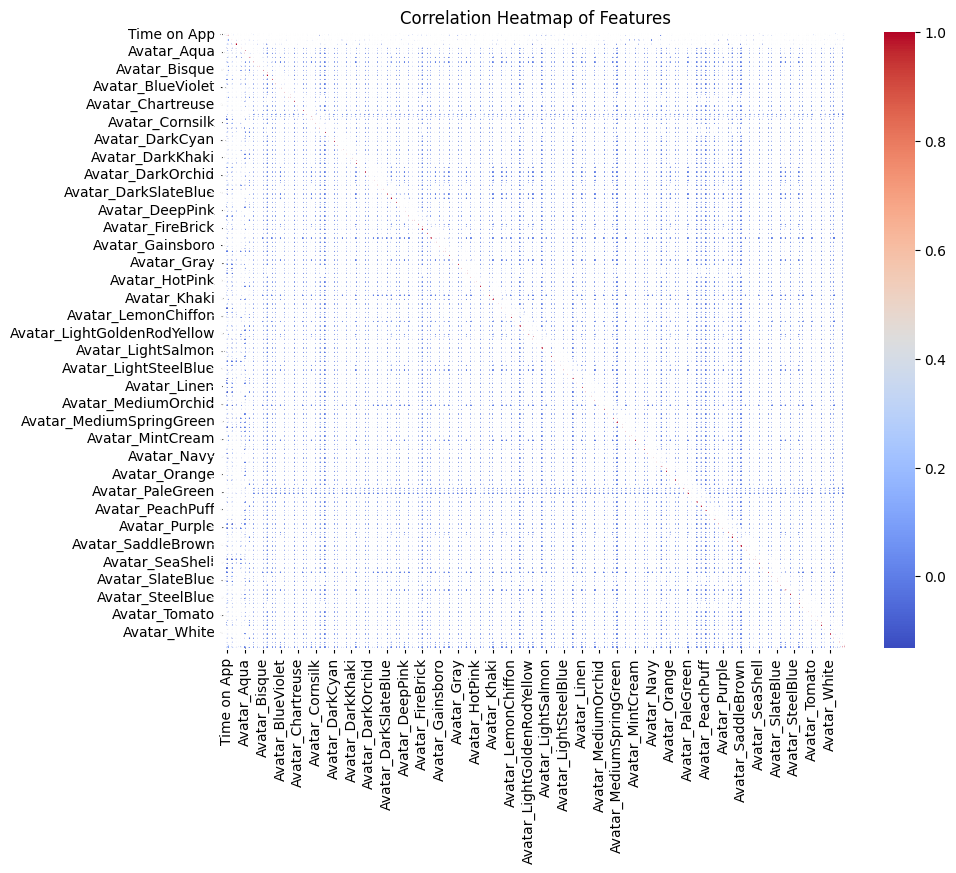

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

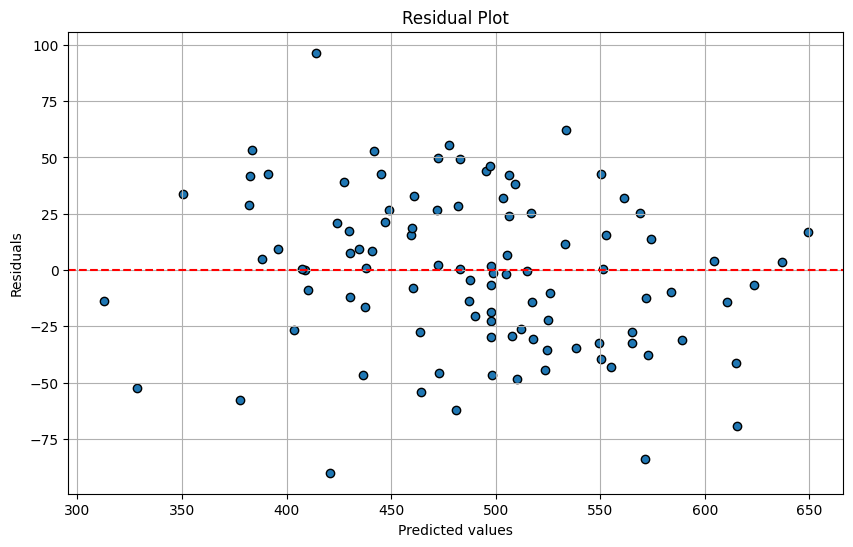

In [ ]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, edgecolors='black')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

Insights and Stats


***Insights & Stats***

Feature Importance (Coefficients):
                   feature    importance
120        Avatar_SeaShell  9.204986e+01
2     Length of Membership  6.339729e+01
52             Avatar_Gray  5.635756e+01
93        Avatar_MistyRose  5.364889e+01
46      Avatar_ForestGreen  5.210185e+01
..                     ...           ...
18            Avatar_Coral  1.101341e-12
41      Avatar_DeepSkyBlue  3.286260e-14
107      Avatar_PapayaWhip  1.199041e-14
75   Avatar_LightSlateGray  1.065814e-14
63        Avatar_LawnGreen  0.000000e+00

[140 rows x 2 columns]

Descriptive Statistics of Yearly Amount Spent:
count    500.000000
mean     499.314240
std       79.314764
min      256.670000
25%      445.037500
50%      498.890000
75%      549.312500
max      765.520000
Name: Yearly Amount Spent, dtype: float64

Distribution of Yearly Amount Spent:


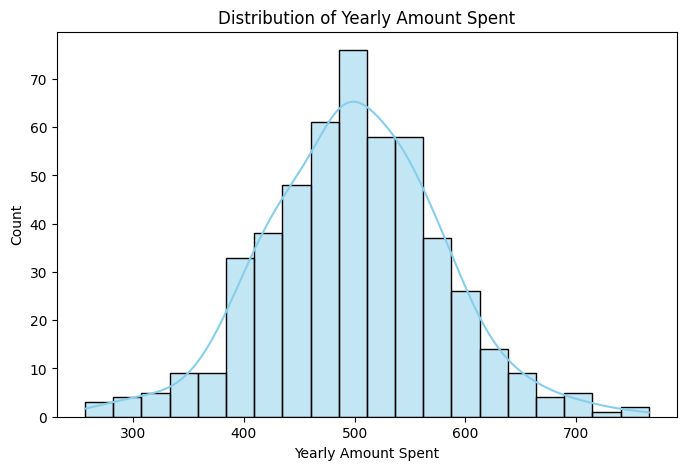

In [ ]:
# 9. Insights and Stats
print("\n***Insights & Stats***")
print("\nFeature Importance (Coefficients):")
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': np.abs(model.coef_)}).sort_values('importance', ascending=False)
print(feature_importance)


print("\nDescriptive Statistics of Yearly Amount Spent:")
print(y.describe())


print("\nDistribution of Yearly Amount Spent:")
plt.figure(figsize=(8, 5))
sns.histplot(y, kde=True, color='skyblue')
plt.title("Distribution of Yearly Amount Spent")
plt.show()